# This notebook will serve for the initial EDA for the inquiries data for the TFW project

In [45]:
# Import necassary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
# load dataset
df_inquiries = pd.read_csv('../data/inquiries_20210713.csv')

In [47]:
# Shape of the dataset
print('The dataset contains %s inquiries and %s features' %(df_inquiries.shape[0], df_inquiries.shape[1]))

The dataset contains 1554218 inquiries and 10 features


In [48]:
# Have a first look at the dataset
df_inquiries.head(2)

,listing_id,title,date,time,adult_count,children_count,pets_count,arrival_date,departure_date,inquiry_price
0,07ab2635-ca78-516a-bbfb-5d1dbf8b9a5a,Anfrage,2019-01-01,00:05:36,6.0,2.0,0.0,2019-07-24,2019-07-31,1840.0
1,b334776d-0cf1-51f1-8cdc-37535b280f3d,Anfrage,2019-01-01,00:07:31,6.0,2.0,0.0,2019-07-24,2019-07-31,1601.0


In [49]:
# First look at the info
df_inquiries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1554218 entries, 0 to 1554217
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   listing_id      1554218 non-null  object 
 1   title           1554218 non-null  object 
 2   date            1554218 non-null  object 
 3   time            1554218 non-null  object 
 4   adult_count     1551754 non-null  float64
 5   children_count  1551754 non-null  float64
 6   pets_count      1551754 non-null  float64
 7   arrival_date    1554218 non-null  object 
 8   departure_date  1554218 non-null  object 
 9   inquiry_price   1312198 non-null  float64
dtypes: float64(4), object(6)
memory usage: 118.6+ MB


In [50]:
# First description of the numerical features
round(df_inquiries.describe(),3)

,adult_count,children_count,pets_count,inquiry_price
count,1551754.000,1551754.000,1551754.000,1312198.000
mean,3.018,0.506,0.195,712.314
std,1.880,1.014,0.647,1241.178
min,0.000,0.000,0.000,0.000
25%,2.000,0.000,0.000,325.000
50%,2.000,0.000,0.000,543.000
75%,4.000,1.000,0.000,885.000
max,55.000,40.000,500.000,750000.000


In [51]:
# Looking for categorical features
df_inquiries.nunique()

listing_id        29655
title                 4
date                731
time              76731
adult_count          42
children_count       26
pets_count           14
arrival_date       1285
departure_date     1289
inquiry_price     16543
dtype: int64

In [52]:
df_inquiries.isna().sum()

listing_id             0
title                  0
date                   0
time                   0
adult_count         2464
children_count      2464
pets_count          2464
arrival_date           0
departure_date         0
inquiry_price     242020
dtype: int64

In [53]:
# Duplicate rows
# Select duplicate rows except first occurrence based on all columns
duplicateRowsDF = df_inquiries[df_inquiries.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF)

Duplicate Rows except first occurrence based on all columns are :
                                   listing_id         title        date  \
18       9b764e35-72c7-50ca-a5b6-b6c58161eed7       Anfrage  2019-01-01   
1271     c2248782-5ad4-5e35-b175-d74a0eef369a       Anfrage  2019-01-01   
2144     6dfa40ef-aa48-54b2-9018-2de3af649845       Anfrage  2019-01-01   
5617     3b21eb42-3c5a-53cc-8464-0b610db60492       Anfrage  2019-01-02   
14335    ea3133ad-da8d-5c1f-a923-8b2a6fb97de8       Anfrage  2019-01-05   
...                                       ...           ...         ...   
1266434  97cd54c3-baf4-54fd-8305-3286256f835a       Anfrage  2020-08-12   
1293167  b439c7ba-4079-58fc-9894-2b5e1f9b70bd       Anfrage  2020-08-21   
1322721  06010cca-7970-5d4b-bea7-cd71eeaf1593       Anfrage  2020-08-30   
1440587  52a4eaa5-902f-5080-8ec5-b528b88604f3       Anfrage  2020-10-03   
1525635  e7851af0-352a-5e96-b55b-2f809180de85  Direktbuchen  2020-07-18   

             time  adult_count  c

We have 83 duplicated rows. We will remove them in the cleaning (see beolw).Exception

## Convert date and time features to the right data type

In [54]:
# Convert column contract_end to datetime
df_inquiries['date'] = pd.to_datetime(df_inquiries['date'])
df_inquiries['time'] = pd.to_datetime(df_inquiries['time'],format= '%H:%M:%S' ).dt.time
df_inquiries['arrival_date'] = pd.to_datetime(df_inquiries['arrival_date'])
df_inquiries['departure_date'] = pd.to_datetime(df_inquiries['departure_date'])

## Looking for correlations

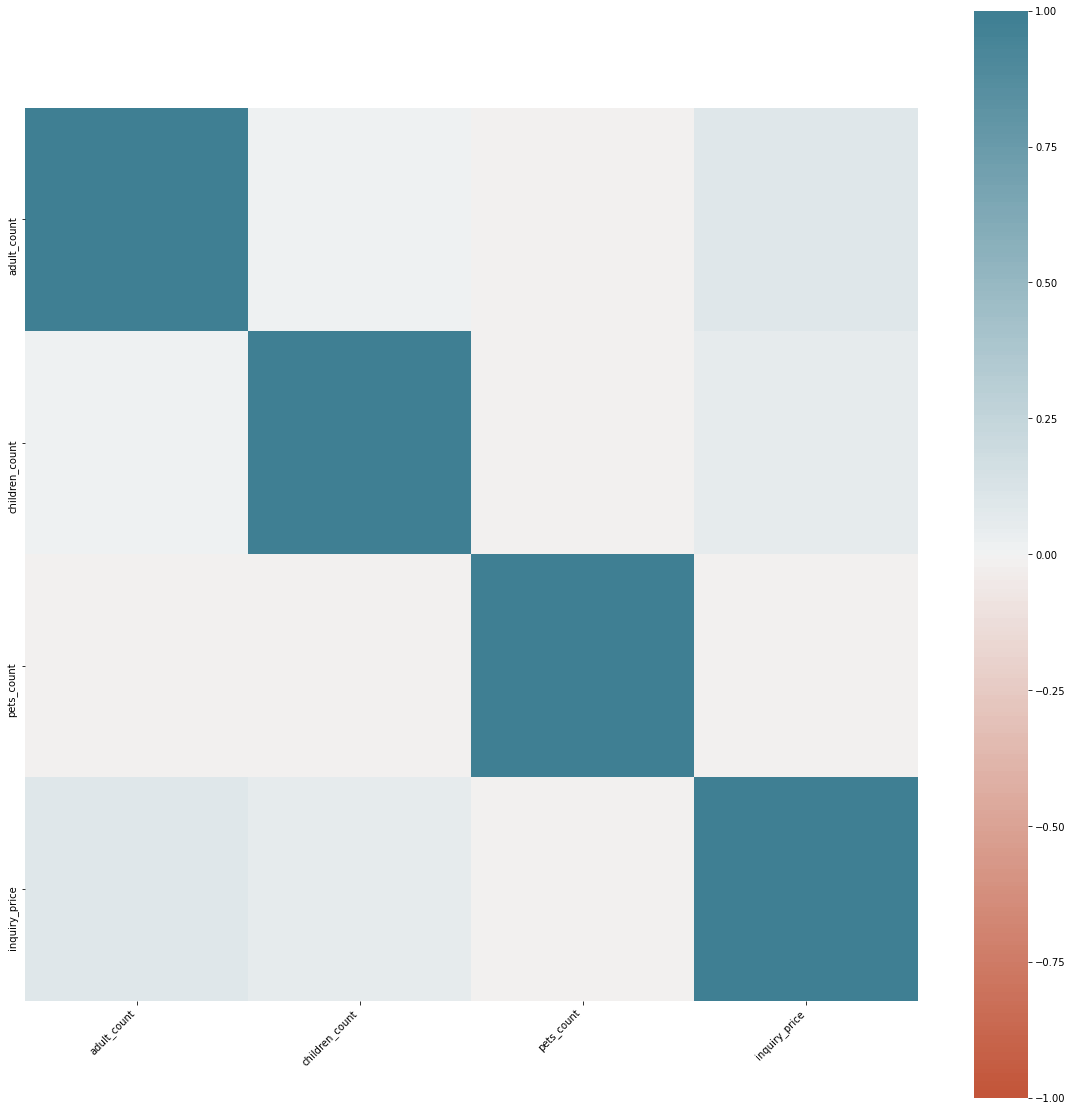

In [55]:
# generate the heatmap
corr = df_inquiries.corr()
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [56]:
# Generate table with correlations 
corr.style.background_gradient(cmap='coolwarm')

,adult_count,children_count,pets_count,inquiry_price
adult_count,1.000000,0.017973,-0.021063,0.100232
children_count,0.017973,1.000000,-0.015350,0.061804
pets_count,-0.021063,-0.015350,1.000000,-0.007923
inquiry_price,0.100232,0.061804,-0.007923,1.000000


## Plotting distribution of the features

<AxesSubplot:>

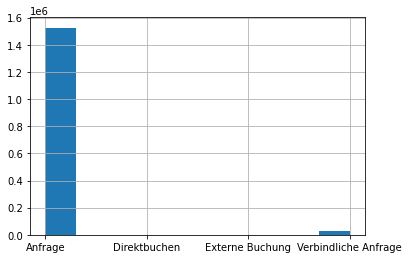

In [57]:
# Plotting the feature title
df_inquiries.title.hist()

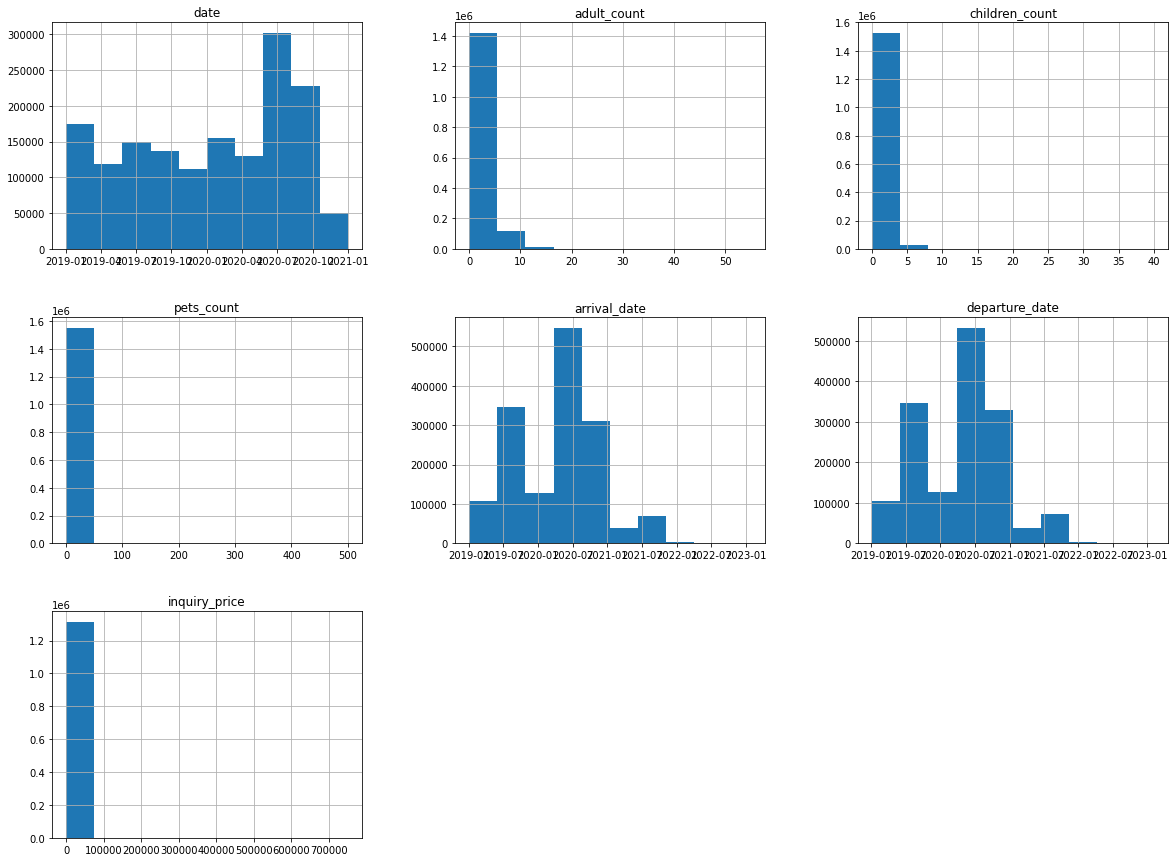

In [58]:
# Plotting histograms of numerical features 
df_inquiries.hist(figsize = (20,15))
plt.show()

## Closer look to all features

### 1. title

In [59]:
# Number of unique values in feature title
print('Number of different title:', df_inquiries.title.nunique())
print('Unique values:', df_inquiries.title.unique())
print('Count of unique values:\n', df_inquiries.title.value_counts())

Number of different title: 4
Unique values: ['Anfrage' 'Direktbuchen' 'Externe Buchung' 'Verbindliche Anfrage']
Count of unique values:
 Anfrage                 1525537
Verbindliche Anfrage      26788
Externe Buchung            1771
Direktbuchen                122
Name: title, dtype: int64


### 2. Counts Adults, Children and Pets

Looking for outliers

<AxesSubplot:>

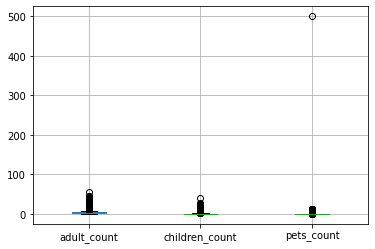

In [60]:
# boxplots
df_inquiries.boxplot(column=['adult_count', 'children_count', 'pets_count'])

In these features are outliers that we have to handle. We decided to go with the statistical procedure and cut off with quantile 0.95 like in all notebooks. This step we will do in the cleaning (see below).

Looking for zero values.

In [61]:
# Looking for zero values
print('Number of zero values in adult count:', df_inquiries.adult_count.isin([0]).sum())
print('Number of zero values in children count:', df_inquiries.children_count.isin([0]).sum())
print('Number of zero values in pets count:', df_inquiries.pets_count.isin([0]).sum())

Number of zero values in adult count: 104
Number of zero values in children count: 1140512
Number of zero values in pets count: 1313352


### 3. Dates: date, time, arrival date, and departure date

In [62]:
# Looking for the range in the features date
print('Min date:', df_inquiries.date.min())
print('Max date:', df_inquiries.date.max())
print('---------------------------')
print('Min time:', df_inquiries.time.min())
print('Max time:', df_inquiries.time.max())
print('---------------------------')
print('Min arrival date:', df_inquiries.arrival_date.min())
print('Max arrival date:', df_inquiries.arrival_date.max())
print('---------------------------')
print('Min departure date:', df_inquiries.departure_date.min())
print('Max departure date:', df_inquiries.departure_date.max())
print('---------------------------')

Min date: 2019-01-01 00:00:00
Max date: 2020-12-31 00:00:00
---------------------------
Min time: 00:00:00
Max time: 23:59:59
---------------------------
Min arrival date: 2019-01-02 00:00:00
Max arrival date: 2023-01-28 00:00:00
---------------------------
Min departure date: 2019-01-04 00:00:00
Max departure date: 2023-02-04 00:00:00
---------------------------


The arrival and departure date are far in the future. We decide to keep the arrival date (so we don't interrupt the length of stay) until 31.12.2021. The last date for inquiries is 31.12.2020, but since inquiries are made for the future, often well in advance, we decided for one year, as it seems most realistic that a booking will also be made from this. This step we will do in the cleaning (see below).

#### Closer view to arrival date

In [68]:

df_inquiries['arrival_date_yearmonth'] = pd.to_datetime(df_inquiries['arrival_date'],format='%Y-%m', errors='coerce').dt.to_period('m')

In [100]:
plot_arrival_date = df_inquiries.groupby('arrival_date_yearmonth').count().reset_index()[['arrival_date_yearmonth', 'listing_id']]

In [101]:
plot_arrival_date['arrival_date_yearmonth'] = plot_arrival_date.arrival_date_yearmonth.astype(str)

In [102]:
plot_arrival_date['arrival_date_yearmonth'] = pd.to_datetime(plot_arrival_date['arrival_date_yearmonth'])

In [106]:
# Split dataset: 2019 and 2020
start_date = "2019-01"
end_date = "2020-12"

after_start_date = plot_arrival_date["arrival_date_yearmonth"] >= start_date
before_end_date = plot_arrival_date["arrival_date_yearmonth"] <= end_date
between_two_dates = after_start_date & before_end_date
filtered_dates = plot_arrival_date.loc[between_two_dates]

Text(0.5, 1.0, 'Overall Inquiries per Month (2019 - 2020)')

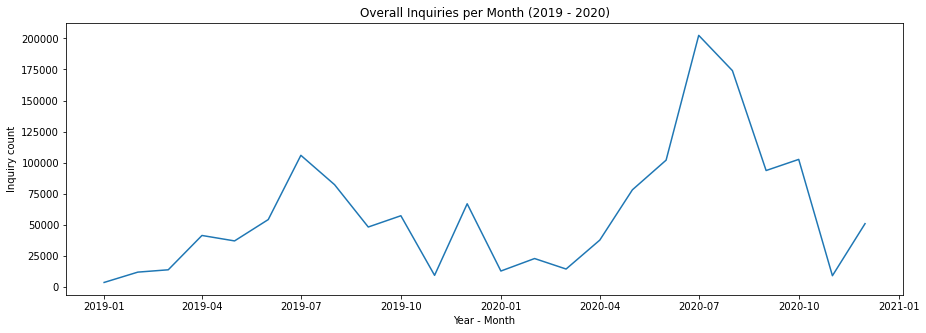

In [108]:
# Plotting a lineplot
fig, ax = plt.subplots(figsize=(15,5))
sns.lineplot(data=filtered_dates, x="arrival_date_yearmonth", y="listing_id")
ax.set(xlabel='Year - Month', ylabel='Inquiry count')
plt.title('Overall Inquiries per Month (2019 - 2020)')

### 3. Inquiries prices

Looking for outliers

<AxesSubplot:>

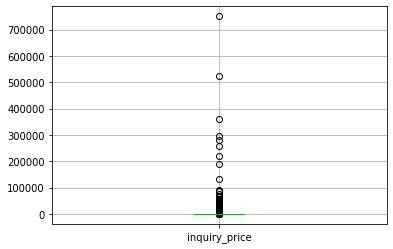

In [19]:
# boxplots
df_inquiries.boxplot(column=['inquiry_price'])

Because of the high values, we also will go with the cut off with percentile 0.95. This step we will do in the cleaning (see below).

Looking for zero values.

In [20]:
# Zero values
print('Number of zero values in inquiry price:', df_inquiries.inquiry_price.isin([0]).sum())

Number of zero values in inquiry price: 41769


## Feature engineering

With the features arrival date and departure date we calculate a new feature length stay. The length of a stay influcences the price.

In [21]:
# Create new feature length of stay
df_inquiries['length_stay'] = df_inquiries.departure_date - df_inquiries.arrival_date

In [22]:
# Looking for the range in the features length stay
print('Min length stay:', df_inquiries.length_stay.min())
print('Max length stay:', df_inquiries.length_stay.max())

Min length stay: 1 days 00:00:00
Max length stay: 676 days 00:00:00


<AxesSubplot:>

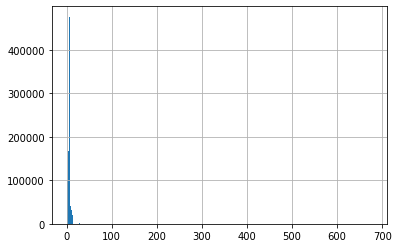

In [23]:
# Plotting the distribution
df_inquiries['length_stay'].dt.days.hist(bins=1000)

We have a wide distribution of the inquire length of stay. We will first going throw the other cleaning steps and following have a second look on this distribution again.

## Clean the dataset

### 1. Duplicated rows

In [24]:
# Remove duplicated rows
df_inquiries.drop_duplicates(keep='first', inplace=True)

### 2. Count adults, children, pets and inquiry price

In [25]:
# Calculate .95 quantile for the features
print('Quantiles 0.95 for:')
print('Adults:', df_inquiries.adult_count.quantile([.95]))
print('Children:', df_inquiries.children_count.quantile([.95]))
print('Pets:', df_inquiries.pets_count.quantile([.95]))
print('inquiry_price:', df_inquiries.inquiry_price.quantile([.95]))

Quantiles 0.95 for:
Adults: 0.95    6.0
Name: adult_count, dtype: float64
Children: 0.95    2.0
Name: children_count, dtype: float64
Pets: 0.95    1.0
Name: pets_count, dtype: float64
inquiry_price: 0.95    1820.0
Name: inquiry_price, dtype: float64


Drop all rows with a number of adults greater than 6.

In [26]:
# How many rows do we drop?
print('Number of dropping rows:', df_inquiries.query('adult_count > 6').shape[0])

Number of dropping rows: 76709


In [27]:
# Get names of indexes for which column adult_count has value greater than 6
indexNames_adult_count = df_inquiries[df_inquiries['adult_count'] > 6].index
# Delete these row indexes from dataset
df_inquiries.drop(indexNames_adult_count , inplace=True)

Drop all rows with a number of children greater than 2.

In [28]:
# How many rows do we drop?
print('Number of dropping rows:', df_inquiries.query('children_count > 2').shape[0])

Number of dropping rows: 63034


In [29]:
# Get names of indexes for which column children_count has value greater than 2
indexNames_children_count = df_inquiries[df_inquiries['children_count'] > 2].index
# Delete these row indexes from dataset
df_inquiries.drop(indexNames_children_count , inplace=True)

Drop all rows with a number of pets greater than 1.

In [30]:
# How many rows do we drop?
print('Number of dropping rows:', df_inquiries.query('pets_count > 1').shape[0])

Number of dropping rows: 47287


In [31]:
# Get names of indexes for which column pets_count has value greater than 1
indexNames_pets_count = df_inquiries[df_inquiries['pets_count'] > 1].index
# Delete these row indexes from dataset
df_inquiries.drop(indexNames_pets_count , inplace=True)

Drop all rows with a number of inquiry price greater than 1820.0.

In [32]:
# How many rows do we drop?
print('Number of dropping rows:', df_inquiries.query('inquiry_price > 1820.0').shape[0])

Number of dropping rows: 49695


In [33]:
# Get names of indexes for which column inquiry_price has value greater than 1820.0
indexNames_inquiry_price = df_inquiries[df_inquiries['inquiry_price'] > 1820.0].index
# Delete these row indexes from dataset
df_inquiries.drop(indexNames_inquiry_price , inplace=True)

### 3. Arrival

Remove dates that are greater than 31.12.2021.

In [34]:
# Remove dates greater than 31.12.2021 
df_inquiries = df_inquiries[pd.to_datetime(df_inquiries.arrival_date) <= pd.to_datetime('2021-12-31')]

### 4. Length of stay

In [35]:
# Looking for the range in the features length stay
print('Min length stay:', df_inquiries.length_stay.min())
print('Max length stay:', df_inquiries.length_stay.max())

Min length stay: 1 days 00:00:00
Max length stay: 674 days 00:00:00


<AxesSubplot:>

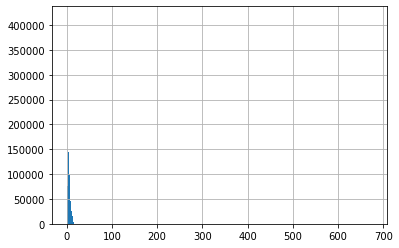

In [36]:
# Plotting the distribution
df_inquiries['length_stay'].dt.days.hist(bins=1000)

Because the distribution doen't change, we decide to clean for this column too.

In [37]:
# Calculate .95 quantile for feature
print('Length stay:', df_inquiries.length_stay.quantile([.95]))

Length stay: 0.95   14 days
Name: length_stay, dtype: timedelta64[ns]


In [38]:
# Convert timedelta to integer
df_inquiries['length_stay'] = df_inquiries.length_stay.dt.days

In [39]:
# How many rows do we drop?
print('Number of dropping rows:', df_inquiries.query('length_stay > 14').shape[0])

Number of dropping rows: 16810


In [40]:
# Get names of indexes for which column length_stay has value greater than 14
indexNames_length_stay = df_inquiries[df_inquiries['length_stay'] > 14].index
# Delete these row indexes from dataset
df_inquiries.drop(indexNames_length_stay , inplace=True)

Shape of the cleaned dataset.

In [41]:
# Shape of the dataset
print('The dataset contains %s inquries and %s features' %(df_inquiries.shape[0], df_inquiries.shape[1]))

The dataset contains 1299788 inquries and 11 features


## Save clean dataset as new CSV

In [42]:
# Export csv
#df_inquiries.to_csv('../data/master_inquiries_20210715.csv')